In [1]:
import sys
sys.path.append("..")
import numpy as np
import trackpy as tp
import nplocate as nl
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [12]:
diameter = 11
img = np.load('image.npy')
xyz = tp.locate(img, diameter=diameter)
xyz = np.array(xyz)[:, :3]
xyz_tp = xyz.copy()

In [13]:
should_add = True
while should_add:
    n0 = xyz.shape[0]
    xyz = nl.add(xyz, img, diameter * 2, diameter, lambda im : np.array(tp.locate(im, diameter))[:, :3])
    n1 = xyz.shape[0]
    should_add = n1 > n0
xyz = nl.refine(xyz, img, diameter * 2, diameter)
xyz.shape, xyz_tp.shape

((279, 3), (190, 3))

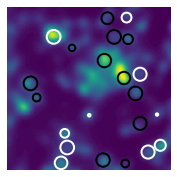

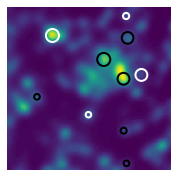

In [14]:
s = 40
axis = 2

nl.see_slice(img, xyz, s, 5.5, axis, sizes=(3, 3))
nl.see_slice(img, xyz_tp, s, 5.5, axis, sizes=(3, 3))

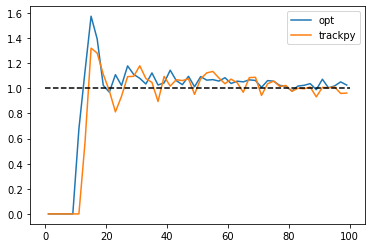

In [16]:
plt.plot(*nl.get_gr(xyz, 100, 51), label="opt")
plt.plot(*nl.get_gr(xyz_tp, 100, 51), label="trackpy")
plt.plot((0, 100), (1, 1), color='k', ls='--')
plt.legend()
plt.show()